<a href="https://colab.research.google.com/github/salmanarif86/MLAI/blob/master/IATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install spacy_cld

In [0]:
!pip install spacy-langdetect

### The following program is a attempt to perform multiclass, multiple classification problem. I am attempting to use modern NLP techniques to solve this classfication problem. This is a dataset provided by IATA with incidents summary provided by passengers in about 10 different languages. The incidents are then classified which has been provided to us as labelled data set. I will first identify languages using SpaCy and then translate the language to English using google's NLP language translation API. The next step would be to use pre-trained word embedding GloVe to get a vector reprsentation of all the text in my training set and then use logistic, svm and XGBoost to train my model. Since it is a multi label classifcation problem it has to be strutured as 22 indiviual binary classification problem. 22 because there are a total of 22 target labels in the dataset.

### My next step would be to use a LSTM network to perform the same classification problem. I will also attempt to use Keras embedding layer to train my embedding from scratch and  check the peroformance of my classiication task. I will also create my own word2vec model using the dataset I have and see if there is any performance imporovement

import all important packages including the LanguageDetector provided natively by SpaCy

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy_cld import LanguageDetector
sns.set()

The first step is to create a dataframe by importing .csv file and using latin encoding as there are quite a few other languages than english. This i found to be the best way to import data when we have other roman languages

In [0]:
df = pd.read_csv('IATA.csv',encoding='latin1')

My first step is to quickly see the shape of my dataframe. This gives me quick access to the number of examples and features that I will be dealing with

In [0]:
df.shape

(20000, 25)

Then i will check the data completeness to see if I have missing data. Looks like i have 16 missing Summary descriptions and 5 missing event titles. However compared to the 20000 examples that I have its safe to drop these rows

In [0]:
df.isna().sum()

Report ID                           0
EventTitle                          5
Summary                            16
Altitude Deviation                  0
Birdstrike                          0
Deep Landing                        0
EGPWS                               0
Hard/Heavy Landing                  0
Runway/Taxiway Incursion            0
Rejected Take Off                   0
Stall Warning                       0
TCAS                                0
Unstable Approach                   0
Cabin Fire/Smoke/Fumes              0
Inadvertant Slide Deployment        0
Passenger and Cabin Crew Injury     0
Rapid Deplaning and Evacuation      0
Turbulence                          0
Brakes and Steering                 0
Cabin Pressurization                0
Engine Surge and Stall              0
Engine Shutdown                     0
Flight Controls                     0
ATC Service Standard                0
Security                            0
dtype: int64

In [0]:
df.dropna(subset=['Summary','EventTitle'],inplace=True)

In [0]:
df.reset_index(drop =True, inplace=True)


Loading the LanguageDectotor package from SpaCy ,instantiating and then addidng this to the pipeline

In [0]:
nlp = spacy.load('en')

In [0]:

language_detector = LanguageDetector()

In [0]:
nlp.add_pipe(language_detector)

Function to remove all ascii characters

In [0]:
def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i)<128)
 


In [0]:
df['Summary'] = df['Summary'].apply(remove_non_ascii)

Applying the language Detection pipeline to the summary column of our database. Creating a list of all the languages corresponding to each row of our summary data and then putting this altogether in a dataframe

In [0]:
docx = df['Summary'].apply(nlp)

In [0]:
languages=[]
for i in docx:
  languages.append(i._.languages)

In [0]:
df_lang = pd.DataFrame(languages)


In [0]:
df_lang.rename(index= str, columns={0: 'Language', 1: 'Language2'},inplace=True)

In [0]:
df_lang.shape

(19979, 2)

In [0]:
df_lang['Language'].unique()

array(['en', 'es', 'fr', 'pt', None, 'de', 'gl', 'is', 'tr', 'nl', 'da',
       'sv', 'cs', 'fi', 'ia', 'hu', 'gd', 'nn', 'la'], dtype=object)

In [0]:
df_lang['LangMap']=df_lang['Language'].map({'en' :'Engllish','es':'Español','fr':'French','pt':'Portuguese','de':'German','gl':'Galician','is':'Icelandic','tr':'Turkish',
                        'nl':'Dutch','sv' : 'Swedish','cs' : 'Czech','fi' :'Finnish', 'ia':'Interlingua','hu':'Hungarian','gd':'Gaelic','nn':'Norwegian Nynorsk','la':'Latin'})


In [0]:
df_merge= pd.concat([df, df_lang], axis = 1)

In [0]:
df_lang.reset_index(drop =True, inplace=True)


RangeIndex(start=0, stop=19979, step=1)

In [0]:
df_merge = df.merge(df_lang,left_index=True, right_index=True)

In [0]:
df_final = df_merge[['Report ID',
 'EventTitle',
 'Summary',
 'LangMap',
 'Altitude Deviation',
 'Birdstrike',
 'Deep Landing',
 'EGPWS',
 'Hard/Heavy Landing',
 'Runway/Taxiway Incursion',
 'Rejected Take Off',
 'Stall Warning',
 'TCAS',
 'Unstable Approach',
 'Cabin Fire/Smoke/Fumes',
 'Inadvertant Slide Deployment',
 'Passenger and Cabin Crew Injury',
 'Rapid Deplaning and Evacuation',
 'Turbulence',
 'Brakes and Steering',
 'Cabin Pressurization',
 'Engine Surge and Stall',
 'Engine Shutdown',
 'Flight Controls',
 'ATC Service Standard',
 'Security',
 'Language',
 'Language2',
]]

In [0]:
df_merge[df_merge['LangMap'] == 'Czech'].loc[4475]['Summary']

'cas cca 4:20 utc- upozorneni od cestujiciho sediciho na leve strane u motoru na unik kapaliny z leveho motoru- f / o provedl vizualni kontrolu a potvrdil unik kapaliny tekouci po spodni zadni casti krytu motoru- ******************* vizualni kontrolu, s potvrzenim uniku. tekouci cira kapalina po krytu motoru- *************************************** ******** ********* ve fl190. komunikace s atc - ***************** situace konzultovana s opc a mcc - v celem case probihala komunika s vk o vznikle situaci- f / o provedl jeste jednou vizualni kontrolu se stejnym zjistenim- cptosobne oznamil vk o nutnosti vypnout levy motor a vyhlasil pripravu kabiny na nouzovou situaci, s navratem do prg. max 20 min na pripravu- ************* *************** vyhlasen pan pan pan a nasledne klesani do fl100 a direct *************** single engine operation checklist- na atc oznameno pocet cestujicich, *************** na palube a dg (zadne) a viditelny unik paliva z leveho motoru- ****** ************** cca ve 

In [5]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [0]:
from google.cloud import translate_v2
from google.cloud import storage
#client = translate.Client.from_service_account_json('/content/My First Project-da1df09996b6.json')
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/My First Project-da1df09996b6.json"

In [0]:
def translate_text(text, target ='en'):
  translation = translate_client.translate(text, target_language= target)
  return translation['translatedText']
  

In [0]:
df_final['Trans']=df_final[df_final['LangMap']=='Turkish']['Summary'].apply(lambda x : translate_text(x))
#df_final['Trans']=df_final[df_final['LangMap']=='Latin']['Summary'].apply(lambda x : translate_text(x))

df_test1 = df_final

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Latin' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Hungarian' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Norwegian Nynorsk' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Gaelic' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Icelandic' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Interlingua' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Finnish' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Czech' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Swedish' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Dutch' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='German' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Galician' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Portuguese' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : x['Summary'] if x['LangMap']=='Engllish' else x['Trans'], axis = 1)

In [0]:
df_test.columns.values

In [0]:
df_test1 = df_test1[['Report ID', 'EventTitle', 'Summary', 'LangMap','Trans',
       'Altitude Deviation', 'Birdstrike', 'Deep Landing', 'EGPWS',
       'Hard/Heavy Landing', 'Runway/Taxiway Incursion',
       'Rejected Take Off', 'Stall Warning', 'TCAS', 'Unstable Approach',
       'Cabin Fire/Smoke/Fumes', 'Inadvertant Slide Deployment',
       'Passenger and Cabin Crew Injury',
       'Rapid Deplaning and Evacuation', 'Turbulence',
       'Brakes and Steering', 'Cabin Pressurization',
       'Engine Surge and Stall', 'Engine Shutdown', 'Flight Controls',
       'ATC Service Standard', 'Security', 'Language', 'Language2']]

In [0]:
df_test1.to_csv('IATA_transformed.csv')

In [0]:
df_test1[df_test1['LangMap']=='French'].shape

(153, 29)

In [0]:
df_translation = pd.read_csv('IATA_transformed.csv', index_col=0)

In [8]:
df_translation.sample(5)

,Report ID,EventTitle,Summary,LangMap,Trans,Altitude Deviation,Birdstrike,Deep Landing,EGPWS,Hard/Heavy Landing,Runway/Taxiway Incursion,Rejected Take Off,Stall Warning,TCAS,Unstable Approach,Cabin Fire/Smoke/Fumes,Inadvertant Slide Deployment,Passenger and Cabin Crew Injury,Rapid Deplaning and Evacuation,Turbulence,Brakes and Steering,Cabin Pressurization,Engine Surge and Stall,Engine Shutdown,Flight Controls,ATC Service Standard,Security,Language,Language2
4015,4021,"ATC - Service STD, Confusion, Clearance, Vecto...",landing in fra on 25l. spacing to previous a /...,Engllish,landing in fra on 25l. spacing to previous a /...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,en,NaN
12088,12098,ENG failure during flight,summary: *************************************...,Engllish,summary: *************************************...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,en,NaN
12814,12824,Overspeed during cruise,"in light turbulence and varying wind, airspeed...",Engllish,"in light turbulence and varying wind, airspeed...",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,en,NaN
8967,8974,Rejected take off,during take off rolling when the aircraft spee...,Engllish,during take off rolling when the aircraft spee...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,en,NaN
2038,2040,(FOP) STICK SHAKER AFTER T/O DUE WAKE TURBULEN...,as preceding a / c (**** 744) lifted off r / w...,Engllish,as preceding a / c (**** 744) lifted off r / w...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,en,NaN


In [9]:
df_translation[df_translation['Trans'].notnull()]['Trans'].drop

(18472,)

In [0]:
import en_core_web_lg
nlp_w2v = en_core_web_lg.load()

In [0]:
train_vec_glove = []
counter = 0
for doc in nlp_w2v.pipe(df_translation[df_translation['Trans'].notnull()]['Trans'], batch_size=500):
    
    if doc.has_vector:
        train_vec_glove.append(doc.vector)
    else:
        train_vec_glove.append(np.zeros((300,), dtype="float32"))
    counter +=1





In [0]:
df_word_space = pd.DataFrame(train_vec_glove)

In [0]:
df_word_space.to_csv('Word_vectors.csv')

In [0]:
df_word_space =pd.read_csv('Word_vectors.csv',index_col=0)

In [14]:
df_word_space.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
18467,0.001337,0.190330,-0.138943,0.031240,0.035461,0.001659,-0.087530,-0.074111,0.051255,1.502308,-0.062256,0.091555,-0.038606,-0.059034,-0.002532,-0.102394,0.037767,1.430937,-0.199997,-0.027772,-0.083884,-0.004008,-0.293448,-0.090982,0.122086,-0.030163,0.011447,-0.043247,0.072882,-0.074794,0.041327,0.043096,-0.063236,-0.042029,0.041217,-0.101227,0.044283,0.097798,-0.057187,0.034594,...,-0.099623,0.165542,-0.010323,-0.090603,0.014173,-0.077340,-0.027641,0.051273,0.430475,-0.242498,0.045578,-0.082231,-0.067885,-0.091779,-0.158681,-0.008888,0.072160,0.061822,-0.102865,0.234915,0.150992,0.029508,0.099832,-0.117595,-0.056211,-0.008236,0.021491,-0.042145,0.232725,0.012673,-0.174244,0.222764,-0.068707,-0.147239,-0.089551,-0.018440,-0.019703,0.038485,0.083408,0.026519
18468,0.013460,0.149025,-0.093260,-0.076260,0.116308,0.149508,-0.082984,-0.149362,-0.068675,1.469078,-0.089757,0.123407,-0.148086,-0.020405,-0.033573,-0.108958,-0.038298,1.531026,-0.207675,0.064367,-0.033560,0.079259,-0.308850,-0.166101,0.248154,-0.021880,-0.067592,-0.053023,0.129166,-0.050348,0.005772,0.019447,-0.041964,-0.072455,-0.029854,-0.097865,0.083622,0.136045,-0.148623,0.068436,...,-0.066718,0.288615,-0.067468,-0.119144,-0.119397,-0.149215,-0.001042,0.016863,0.530156,-0.315392,-0.048934,-0.159502,0.010967,-0.147262,-0.145723,0.022302,0.103864,0.077082,-0.127653,0.294186,0.181359,0.041374,0.077529,-0.193136,-0.104896,-0.059583,0.025637,-0.070753,0.279494,-0.025961,-0.168679,0.216384,-0.162980,-0.120363,-0.089974,0.044829,-0.006536,0.078625,0.109349,0.092511
18469,-0.020635,0.252509,-0.133132,-0.135729,0.288330,0.109302,-0.001697,-0.288748,-0.022607,0.796803,-0.091238,0.130761,-0.234004,-0.005497,0.000894,-0.179351,-0.008627,1.713876,-0.231235,0.014357,0.049159,0.126660,-0.432478,-0.181368,0.231968,-0.059568,0.019859,0.084030,0.256277,-0.084063,0.018917,0.177967,-0.063840,-0.252939,0.175934,-0.085429,0.190321,0.214314,-0.241033,0.153894,...,-0.324414,0.229272,-0.048675,-0.188955,-0.183492,-0.086325,-0.082463,-0.057555,0.862421,-0.397940,-0.246373,-0.261613,0.025789,-0.094049,-0.350068,-0.046253,0.153904,0.142870,-0.239527,0.317811,0.239334,0.164386,0.129779,-0.327719,-0.052153,0.016497,0.037031,-0.074475,0.287498,-0.101025,-0.285788,0.278675,-0.453936,-0.274110,-0.116391,0.041438,-0.000089,0.036912,0.284259,0.150243
18470,0.101641,0.138715,-0.188207,-0.003672,0.156936,0.024288,-0.071164,-0.061186,-0.011654,2.039478,-0.124655,0.063994,0.034428,-0.042402,-0.081270,-0.059772,-0.068873,1.178257,-0.162525,-0.022679,-0.051629,0.009240,-0.128183,0.000204,0.052338,-0.029600,-0.050412,-0.050602,0.038758,-0.116309,-0.011048,0.075922,-0.041426,0.043135,0.056401,-0.086607,0.023210,0.083748,-0.098185,-0.033913,...,0.039644,0.186185,0.021913,0.000607,0.100352,-0.069307,-0.007161,-0.020176,0.301386,-0.056697,0.100660,-0.014382,-0.025319,-0.165569,-0.043531,0.039346,0.031810,0.097624,-0.048268,0.176718,0.184863,0.034243,0.029479,-0.049539,-0.023949,-0.074321,0.037791,-0.081155,0.162596,-0.005583,-0.195910,0.112375,-0.038289,-0.106320,-0.017362,0.026187,-0.028597,0.010269,0.051945,0.048405
18471,0.043757,0.130357,-0.096733,-0.063770,0.176848,0.074065,-0.045201,-0.048908,0.000003,1.477917,-0.011601,0.115751,-0.053230,-0.024952,-0.116700,-0.074265,-0.106437,1.115289,-0.176739,-0.004039,0.000812,0.092392,-0.151823,-0.015341,0.109446,-0.035765,-0.059309,-0.074913,0.057992,-0.080226,0.002434,0.072750,-0.038729,-0.008761,-0.010530,-0.160597,0.012232,0.113313,-0.022861,0.027584,...,-0.030604,0.118256,0.021353,-0.072639,0.025611,-0.162780,-0.056709,0.043653,0.295126,-0.138263,0.076551,-0.051910,0.011879,-0.099266,-0.131146,0.022931,-0.000649,0.084206,-0.047305,0.133042,0.161443,0.031975,0.101918,-0.057237,-0.032899,-

In [0]:
df_data = df_translation[df_translation['Trans'].notnull()]

In [16]:
df_data.sample(3)

,Report ID,EventTitle,Summary,LangMap,Trans,Altitude Deviation,Birdstrike,Deep Landing,EGPWS,Hard/Heavy Landing,Runway/Taxiway Incursion,Rejected Take Off,Stall Warning,TCAS,Unstable Approach,Cabin Fire/Smoke/Fumes,Inadvertant Slide Deployment,Passenger and Cabin Crew Injury,Rapid Deplaning and Evacuation,Turbulence,Brakes and Steering,Cabin Pressurization,Engine Surge and Stall,Engine Shutdown,Flight Controls,ATC Service Standard,Security,Language,Language2
18562,18582,ENGINE VIBRATION #4 A & B SYSTEM - 5 UNITS,engine shutdown iaw qrh,Engllish,engine shutdown iaw qrh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,en,NaN
4000,4006,burn injury,i and *** (ap) were taking out f / d food out ...,Engllish,i and *** (ap) were taking out f / d food out ...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,en,NaN
1934,1936,Speed exceedance - turbulence,due to unexpected severe turbulence at fl 301 ...,Engllish,due to unexpected severe turbulence at fl 301 ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,en,NaN


In [17]:
df_data.reset_index(drop =True, inplace=True)
df_data.shape


(18472, 29)

In [0]:
index_drop = df_data[df_data['Summary'] == 'no summary'].index.values

In [19]:
df_data_new = df_data.drop(df_data.index[[index_drop]])
df_data_new.sample(2)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:3969: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Report ID,EventTitle,Summary,LangMap,Trans,Altitude Deviation,Birdstrike,Deep Landing,EGPWS,Hard/Heavy Landing,Runway/Taxiway Incursion,Rejected Take Off,Stall Warning,TCAS,Unstable Approach,Cabin Fire/Smoke/Fumes,Inadvertant Slide Deployment,Passenger and Cabin Crew Injury,Rapid Deplaning and Evacuation,Turbulence,Brakes and Steering,Cabin Pressurization,Engine Surge and Stall,Engine Shutdown,Flight Controls,ATC Service Standard,Security,Language,Language2
4652,5063,Flight Management - Runway Incursion,"landing rwy 34l in fco, at taxiway ad, aircraf...",Engllish,"landing rwy 34l in fco, at taxiway ad, aircraf...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,en,NaN
10639,11549,TAXIWAY INCURSION,crew understood initial taxi clearance from st...,Engllish,crew understood initial taxi clearance from st...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,en,NaN


In [0]:
df_word_space_new = df_word_space.drop(df_data.index[[index_drop]])
df_word_space_new.shape
#df_data[df_data['Summary'] == 'no summary']

In [0]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_word_space_new, df_data_new['Passenger and Cabin Crew Injury'], test_size=0.20, random_state=42)


In [0]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression


In [0]:
model = RidgeClassifier(alpha=5000)

In [25]:
model.fit(X_train,y_train)

RidgeClassifier(alpha=5000, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [26]:
model.score(X_test,y_test)

0.9338865836791148

In [0]:
model2 = LogisticRegression()

In [28]:
model2.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
model2.score(X_test,y_test)

0.9690179806362379

In [30]:
prob_ls = model2.predict_proba(X_test)[:,1]
type(prob_ls)

numpy.ndarray

In [0]:
auc_score = roc_auc_score(y_test, prob_ls)


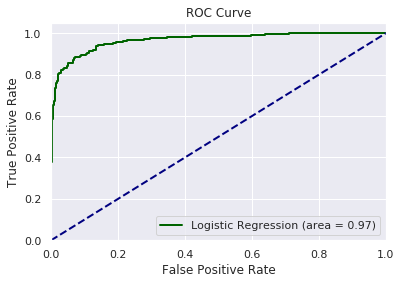

In [32]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, prob_ls)
roc_auc =auc(lr_fpr, lr_tpr)
plt.figure()

plt.plot(lr_fpr, lr_tpr, color='darkgreen',
         lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
y_pred_lr = model2.predict(X_test)

In [35]:
print(classification_report(y_pred_lr, y_test))
print(confusion_matrix(y_pred_lr, y_test))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3448
           1       0.62      0.88      0.72       167

    accuracy                           0.97      3615
   macro avg       0.80      0.93      0.85      3615
weighted avg       0.98      0.97      0.97      3615

[[3356   92]
 [  20  147]]


In [0]:
from xgboost import XGBClassifier

In [0]:
model4 =XGBClassifier()

In [38]:
model4.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
model4.score(X_test,y_test)

0.9690179806362379

In [0]:
y_pred_xgb = model4.predict(X_test)

In [0]:
y_proba_xgb = model4.predict_proba(X_test)[:,1]


In [42]:
auc_score = roc_auc_score(y_test, y_proba_xgb)
auc_score

0.9687729282753971

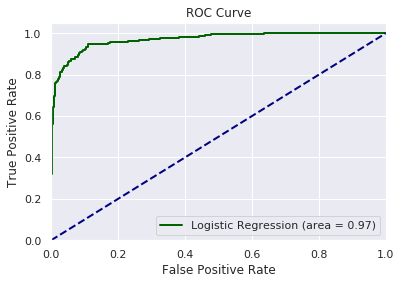

In [43]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_proba_xgb)
roc_auc =auc(lr_fpr, lr_tpr)
plt.figure()

plt.plot(lr_fpr, lr_tpr, color='darkgreen',
         lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [44]:
print(classification_report(y_pred_xgb, y_test))
print(confusion_matrix(y_pred_xgb, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3442
           1       0.63      0.87      0.73       173

    accuracy                           0.97      3615
   macro avg       0.81      0.92      0.86      3615
weighted avg       0.98      0.97      0.97      3615

[[3353   89]
 [  23  150]]


In [0]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [0]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [0]:
from datetime import datetime

In [0]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )


random_search.fit(X_train, y_train)


In [0]:
random_search.best_params_

In [0]:
random_search.best_score_

In [0]:
model5 =XGBClassifier(colsample_bytree= 0.8,
 gamma= 1.5,
 max_depth= 5,
 min_child_weight= 1,
 subsample= 0.6)

In [49]:
model5.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [50]:
model5.score(X_test, y_test)

0.9742738589211618

In [51]:
y_proba_xgb = model5.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, y_proba_xgb)
auc_score


0.9772625870035098

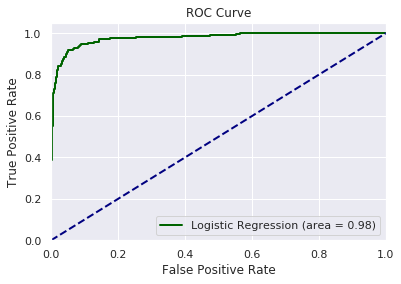

In [52]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_proba_xgb)
roc_auc =auc(lr_fpr, lr_tpr)
plt.figure()

plt.plot(lr_fpr, lr_tpr, color='darkgreen',
         lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [0]:
y_pred_xgb = model5.predict(X_test)

In [54]:
print(classification_report(y_pred_xgb, y_test))
print(confusion_matrix(y_pred_xgb, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3431
           1       0.69      0.90      0.78       184

    accuracy                           0.97      3615
   macro avg       0.84      0.94      0.88      3615
weighted avg       0.98      0.97      0.98      3615

[[3357   74]
 [  19  165]]


In [55]:
from keras.layers import Dense, GRU,LSTM, Embedding, Flatten, Bidirectional,GlobalMaxPool1D,Conv1D, Dropout, SimpleRNN
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam, RMSprop, SGD
from keras.initializers import Constant
from keras.models import Sequential
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


#Neural Network

As we know that text classifcation can now be powered using Neural Netoworks that have the ability to learn much complex relationships. Seq modelling for NLP related tasks have found the biggest improvement. However as a baseline model we will first consider a very simple Feed Forward Neural Network. Then we will try to beat the performance (Recall, Precission, F1 score) using a seq models like RNN

In [0]:
model = Sequential()

In [0]:
model.add(Dense(64, activation='relu',input_shape=(300,)))
model.add(Dense(46, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
import tensorflow as tf

creating a custom loss function for validation. This is not available out of the box in Keras so as a result we are creating our own. This is being treated as a binary classifcation problem and hence ROC is a good loss measure

In [0]:
def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [0]:

model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=[auroc])


In [0]:
model.fit(X_train.values,y_train.values, epochs= 14,  batch_size=512, validation_data=[X_test.values, y_test.values])

In [0]:
y_pred_nn = model.predict_classes(X_test)

Now the baseline feed forward Neural Network is already beeter than our XGB model with a precision of 74% and recall of 82% and an F1score which is a harmonic mean of precision and recall of about 78%

In [63]:
print(confusion_matrix(y_pred_nn, y_test.values))
print(classification_report(y_pred_nn, y_test.values))

[[3338   63]
 [  38  176]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3401
           1       0.74      0.82      0.78       214

    accuracy                           0.97      3615
   macro avg       0.86      0.90      0.88      3615
weighted avg       0.97      0.97      0.97      3615



#Custom Trained Embedding

Now we will use a much more sophisticated model which has been shown to perform very well for both text analytics and timeseries data. In this particular case we will create our embedding during our training phase. Remember this embedding is being trained on our domain specfic data and we are not borrowing a pre-trained embedding (GloVe, Word2vec) 

The process will involve first tokenizing the data and then creating a sequence to reprsent the index of each word


In [0]:
tokenizer = Tokenizer(num_words=10000)

tokenizer.fit_on_texts(df_data_new.Summary)

sequences = tokenizer.texts_to_sequences(df_data_new.Summary)

In [0]:
word_index = tokenizer.word_index

In [0]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(sequences, df_data_new['Passenger and Cabin Crew Injury'], test_size=0.20, random_state=42)

In [0]:
X_train_k = pad_sequences(X_train_k, maxlen=300)
X_test_k = pad_sequences(X_test_k, maxlen=300)

In [148]:
model_emb = Sequential()
model_emb.add(Embedding(10000,200, input_length=300))
model_emb.add(Flatten())
model_emb.add(Dense(46, activation='relu'))
model_emb.add(Dense(46, activation='relu'))
model_emb.add(Dropout(0.1))
model_emb.add(Dense(18, activation='relu'))
model_emb.add(Dense(6, activation='relu'))
model_emb.add(Dense(1, activation='sigmoid'))

model_emb.compile(optimizer='Adam', loss='binary_crossentropy', metrics =[auroc])
model_emb.summary()

  
    
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 200)          2000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 60000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 46)                2760046   
_________________________________________________________________
dense_11 (Dense)             (None, 46)                2162      
_________________________________________________________________
dropout_2 (Dropout)          (None, 46)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 18)                846       
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 114       
__________

In [149]:
history = model_emb.fit(X_train_k, y_train_k, epochs =2, batch_size=256, validation_data=[X_test_k, y_test_k])

Train on 14460 samples, validate on 3615 samples
Epoch 1/2
14460/14460 [==============================] - 14s 981us/step - loss: 0.2326 - auroc: 0.7261 - val_loss: 0.1074 - val_auroc: 0.9737
Epoch 2/2
14460/14460 [==============================] - 13s 926us/step - loss: 0.0710 - auroc: 0.9856 - val_loss: 0.0693 - val_auroc: 0.9802


In [0]:
y_pred_emb = model_emb.predict_classes(X_test_k)

The model performs slightly better than our feed forward network where thr f1-score has improved from 78% to 81 %. Not bad for a model where we have performed no hyperparameter tuning

In [151]:
print(confusion_matrix(y_pred_emb, y_test_k.values))
print(classification_report(y_pred_emb, y_test_k.values))

[[3354   61]
 [  22  178]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3415
           1       0.74      0.89      0.81       200

    accuracy                           0.98      3615
   macro avg       0.87      0.94      0.90      3615
weighted avg       0.98      0.98      0.98      3615



Now as we know this is a hugely imbalanced dataset. We will now try to undersample our data where we will bring down the  number of negative sample equal to the positive sample and use the exact same archtiecture parameters and hyperparameters 

In [0]:
under_sample_train = pd.DataFrame(np.column_stack((X_train_k,y_train_k)))

In [0]:
under_sample_train_min = under_sample_train[under_sample_train[300]==1]
under_sample_train_max = under_sample_train[under_sample_train[300]==0]

if len(under_sample_train_max)>len(under_sample_train_min):
  under_sample_train_max = under_sample_train_max.sample(n=len(under_sample_train_min),replace=True)
else:
  under_sample_train_min = under_sample_train_min.sample(n=len(under_sample_train_max),replace=True)
  
trn = pd.concat([under_sample_train_max, under_sample_train_min],axis=0)

In [0]:
y_trn = trn[300]
x_trn = trn.drop(300, axis = 1)



In [0]:
X_train_und, X_test_und, y_train_und, y_test_und = train_test_split(x_trn, y_trn, test_size=0.20, random_state=42)

In [0]:
X_train_und = pad_sequences(X_train_und.values, maxlen=300)
X_test_und = pad_sequences(X_test_und.values, maxlen=300)


In [157]:
history = model_emb.fit(X_train_und, y_train_und, epochs =3, batch_size=256, validation_data=[X_test_und, y_test_und])

Train on 1406 samples, validate on 352 samples
Epoch 1/3
1406/1406 [==============================] - 2s 1ms/step - loss: 0.1606 - auroc: 0.9952 - val_loss: 0.0808 - val_auroc: 0.9989
Epoch 2/3
1406/1406 [==============================] - 1s 944us/step - loss: 0.0820 - auroc: 0.9971 - val_loss: 0.0580 - val_auroc: 0.9990
Epoch 3/3
1406/1406 [==============================] - 1s 947us/step - loss: 0.0535 - auroc: 0.9985 - val_loss: 0.0514 - val_auroc: 0.9991


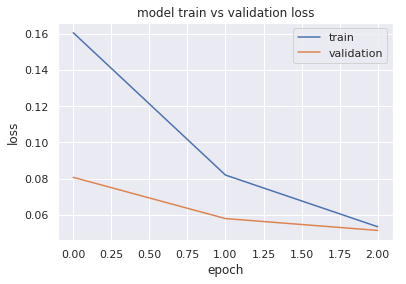

In [158]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc ='upper right')
plt.show()

In [0]:
y_pred_emb_und = model_emb.predict_classes(X_test_und)

In [161]:
y_pred_emb_und.shape

(3615, 1)

WOOOW!!! we get an astonishing improvement of an F1-score of 98%. Our undersampling technique has resulted in a huge improvement

In [163]:
print(confusion_matrix(y_pred_emb_und, y_test_und.values))
print(classification_report(y_pred_emb_und, y_test_und.values))

[[181   5]
 [  2 164]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       186
           1       0.97      0.99      0.98       166

    accuracy                           0.98       352
   macro avg       0.98      0.98      0.98       352
weighted avg       0.98      0.98      0.98       352



#Pre-Trained Word Embedding (GloVe)

In this particular case we will now try to use a pre-trained GloVe embedding. This is an example of transfer learning where our embedding have been trained on a very large corpus of english text and we will employ this to see if we can get an improved performance. The idea is that this embedding has been trained on English text which is much larger than our custom trained model

In [0]:
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(df_word_space_new, df_data_new['Passenger and Cabin Crew Injury'], test_size=0.2, random_state=21)

In [0]:
#K.clear_session()
model_glv = Sequential()
model_glv.add(Dense(512, activation='relu', input_dim =300))
model_glv.add(Dense(256, activation='relu'))
model_glv.add(Dropout(0.1))
model_glv.add(Dense(120, activation='relu'))
model_glv.add(Dropout(0.1))
model_glv.add(Dense(60, activation='relu'))
model_glv.add(Dense(18, activation='relu'))
model_glv.add(Dense(6, activation='relu'))
model_glv.add(Dense(1, activation='sigmoid'))

model_glv.compile(optimizer='Adam', loss='binary_crossentropy', metrics =[auroc])
model_glv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 512)               154112    
_________________________________________________________________
dense_62 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 120)               30840     
_________________________________________________________________
dropout_13 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_65 (Dense)             (None, 18)                1098      
__________

In [0]:
history = model_glv.fit(X_train_glove, y_train_glove, epochs =6, batch_size=256, validation_data=[X_test_glove, y_test_glove])

Train on 14460 samples, validate on 3615 samples
Epoch 1/6
14460/14460 [==============================] - 4s 249us/step - loss: 0.2266 - auroc: 0.7604 - val_loss: 0.1104 - val_auroc: 0.9627
Epoch 2/6
14460/14460 [==============================] - 2s 111us/step - loss: 0.1065 - auroc: 0.9643 - val_loss: 0.1162 - val_auroc: 0.9742
Epoch 3/6
14460/14460 [==============================] - 2s 108us/step - loss: 0.0931 - auroc: 0.9731 - val_loss: 0.0774 - val_auroc: 0.9781
Epoch 4/6
14460/14460 [==============================] - 2s 107us/step - loss: 0.0760 - auroc: 0.9779 - val_loss: 0.0778 - val_auroc: 0.9793
Epoch 5/6
14460/14460 [==============================] - 2s 107us/step - loss: 0.0686 - auroc: 0.9800 - val_loss: 0.0761 - val_auroc: 0.9835
Epoch 6/6
14460/14460 [==============================] - 2s 109us/step - loss: 0.0692 - auroc: 0.9817 - val_loss: 0.0796 - val_auroc: 0.9838


In [0]:
y_pred_glv = model_glv.predict_classes(X_test_glove)

The performance has actually degraded when using GloVe embedding. GloVe embedding usually perform better when we have a very small training set. In our case our training set is decent size so our custom embedding were probably able to learn better as it was very domain specific

In [0]:
print(confusion_matrix(y_pred_glv, y_test_glove.values))
print(classification_report(y_pred_glv, y_test_glove.values))

[[3381   79]
 [  23  132]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3460
           1       0.63      0.85      0.72       155

    accuracy                           0.97      3615
   macro avg       0.81      0.91      0.85      3615
weighted avg       0.98      0.97      0.97      3615



#RNN with custom Embedding

Now we will try to use a more sophisticated Neural Network called the RNN. This network has the ability to retain text that was part of precedding time and input them back into the model. This allows for better performance where the context of the sentence is detected by using the a sequence of words. In this example we will use a simple RNN and will train our own embeddings

In [0]:
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(sequences, df_data_new['Passenger and Cabin Crew Injury'], test_size=0.20, random_state=42)

In [0]:
X_train_rnn = pad_sequences(X_train_rnn, maxlen=500)
X_test_rnn = pad_sequences(X_test_rnn, maxlen=500)

In [166]:
model_rnn = Sequential()
model_rnn.add(Embedding(10000, 200))
model_rnn.add(SimpleRNN(32, return_sequences=True))
model_rnn.add(SimpleRNN(12))

model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='Adam', loss='binary_crossentropy', metrics =[auroc])
model_rnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 200)         2000000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          7456      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 12)                540       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 13        
Total params: 2,008,009
Trainable params: 2,008,009
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_rnn = model_rnn.fit(X_train_rnn, y_train_rnn, epochs =4, batch_size=200, validation_data=[X_test_rnn, y_test_rnn])

Train on 14460 samples, validate on 3615 samples
Epoch 1/4
14460/14460 [==============================] - 45s 3ms/step - loss: 0.0177 - auroc: 0.9980 - val_loss: 0.1045 - val_auroc: 0.9555
Epoch 2/4
14460/14460 [==============================] - 43s 3ms/step - loss: 0.0114 - auroc: 0.9991 - val_loss: 0.1045 - val_auroc: 0.9582
Epoch 3/4
14460/14460 [==============================] - 43s 3ms/step - loss: 0.0083 - auroc: 0.9995 - val_loss: 0.1050 - val_auroc: 0.9600
Epoch 4/4
14460/14460 [==============================] - 43s 3ms/step - loss: 0.0066 - auroc: 0.9998 - val_loss: 0.1122 - val_auroc: 0.9557


In [0]:
y_pred_rnn = model_rnn.predict_classes(X_test_rnn)

The RNN model does give us some improvement

In [0]:
print(confusion_matrix(y_pred_rnn, y_test_k.values))
print(classification_report(y_pred_rnn, y_test_k.values))

[[3347   87]
 [  29  152]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3434
           1       0.64      0.84      0.72       181

    accuracy                           0.97      3615
   macro avg       0.81      0.91      0.85      3615
weighted avg       0.97      0.97      0.97      3615



Now trying the same RNN architecture with undersampled data. 

In [167]:
X_train_rnn_und = pad_sequences(X_train_und, maxlen=500)
X_test_rnn_und = pad_sequences(X_test_und, maxlen=500)

history_rnn_und = model_rnn.fit(X_train_und, y_train_und, epochs =4, batch_size=200, validation_data=[X_test_und, y_test_und])

Train on 1406 samples, validate on 352 samples
Epoch 1/4
1406/1406 [==============================] - 4s 3ms/step - loss: 0.6503 - auroc: 0.6901 - val_loss: 0.5338 - val_auroc: 0.8814
Epoch 2/4
1406/1406 [==============================] - 3s 2ms/step - loss: 0.2874 - auroc: 0.9935 - val_loss: 0.3526 - val_auroc: 0.9394
Epoch 3/4
1406/1406 [==============================] - 3s 2ms/step - loss: 0.1788 - auroc: 0.9983 - val_loss: 0.3624 - val_auroc: 0.9374
Epoch 4/4
1406/1406 [==============================] - 2s 2ms/step - loss: 0.1285 - auroc: 0.9997 - val_loss: 0.3649 - val_auroc: 0.9292


We see that the performance has improved but still doesnt beat our feed forward network of custom trained embedding layer

In [169]:
y_pred_rnn_und = model_rnn.predict_classes(X_test_und)

print(confusion_matrix(y_pred_rnn_und, y_test_und.values))
print(classification_report(y_pred_rnn_und, y_test_und.values))

[[164  25]
 [ 19 144]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       189
           1       0.85      0.88      0.87       163

    accuracy                           0.88       352
   macro avg       0.87      0.88      0.87       352
weighted avg       0.88      0.88      0.88       352



#LSTM with custom embedding

Now lets test one last model by replacing simple RNN cells with LSTM cell. LSTM cells have a forget and keep gate . These cells have a tendency to keep much larger sequence reprsentation as compared to a simple RNN

In [0]:
X_train_lstm = pad_sequences(X_train_k, maxlen=800)
X_test_lstm = pad_sequences(X_test_k, maxlen=800)

In [198]:
model_lstm = Sequential()
model_lstm.add(Embedding(10000,100))
model_lstm.add(LSTM(48,recurrent_dropout= 0.3))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='Adam', loss='binary_crossentropy', metrics =[auroc])
model_lstm.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
lstm_6 (LSTM)                (None, 48)                28608     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 49        
Total params: 1,028,657
Trainable params: 1,028,657
Non-trainable params: 0
_________________________________________________________________


In [0]:
|history_lstm = model_lstm.fit(X_train_lstm, y_train_k, epochs =4, batch_size=512, validation_data=[X_test_lstm, y_test_k])

Train on 14460 samples, validate on 3615 samples
Epoch 1/4
14460/14460 [==============================] - 131s 9ms/step - loss: 0.4347 - auroc: 0.6398 - val_loss: 0.2649 - val_auroc: 0.8816
Epoch 2/4
14460/14460 [==============================] - 123s 8ms/step - loss: 0.2117 - auroc: 0.7912 - val_loss: 0.2018 - val_auroc: 0.9342
Epoch 3/4
14460/14460 [==============================] - 123s 9ms/step - loss: 0.1405 - auroc: 0.9425 - val_loss: 0.1069 - val_auroc: 0.9585
Epoch 4/4
14460/14460 [==============================] - 124s 9ms/step - loss: 0.0767 - auroc: 0.9774 - val_loss: 0.0892 - val_auroc: 0.9678


In [0]:
y_pred_lstm = model_lstm.predict_classes(X_test_lstm)

In [0]:
print(confusion_matrix(y_pred_lstm, y_test_k.values))
print(classification_report(y_pred_lstm, y_test_k.values))

[[3343   71]
 [  33  168]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3414
           1       0.70      0.84      0.76       201

    accuracy                           0.97      3615
   macro avg       0.85      0.91      0.87      3615
weighted avg       0.97      0.97      0.97      3615



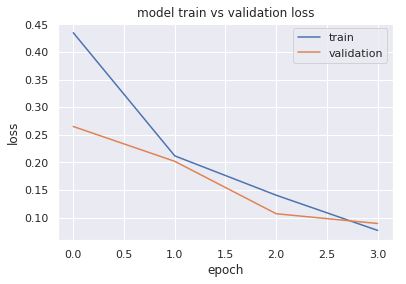

In [0]:
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc ='upper right')
plt.show()

Now trying it with undersampled data using the same LST archtecture

In [199]:
X_train_lstm_und = pad_sequences(X_train_und, maxlen=300)
X_test_lstm_und = pad_sequences(X_test_und, maxlen=300)

history_lstm_und = model_lstm.fit(X_train_lstm_und, y_train_und, epochs =23, batch_size=512, validation_data=[X_test_lstm_und, y_test_und])



Train on 1406 samples, validate on 352 samples
Epoch 1/23
1406/1406 [==============================] - 7s 5ms/step - loss: 0.6927 - auroc: 0.5419 - val_loss: 0.6903 - val_auroc: 0.7157
Epoch 2/23
1406/1406 [==============================] - 4s 3ms/step - loss: 0.6860 - auroc: 0.8587 - val_loss: 0.6849 - val_auroc: 0.8289
Epoch 3/23
1406/1406 [==============================] - 4s 3ms/step - loss: 0.6765 - auroc: 0.9450 - val_loss: 0.6767 - val_auroc: 0.8708
Epoch 4/23
1406/1406 [==============================] - 4s 3ms/step - loss: 0.6622 - auroc: 0.9618 - val_loss: 0.6632 - val_auroc: 0.8948
Epoch 5/23
1406/1406 [==============================] - 4s 3ms/step - loss: 0.6391 - auroc: 0.9726 - val_loss: 0.6403 - val_auroc: 0.9115
Epoch 6/23
1406/1406 [==============================] - 4s 3ms/step - loss: 0.6019 - auroc: 0.9732 - val_loss: 0.6005 - val_auroc: 0.9259
Epoch 7/23
1406/1406 [==============================] - 4s 3ms/step - loss: 0.5378 - auroc: 0.9733 - val_loss: 0.5265 - val_a

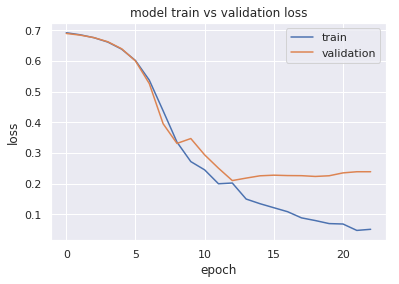

In [200]:
plt.plot(history_lstm_und.history['loss'])
plt.plot(history_lstm_und.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc ='upper right')
plt.show()

In [0]:
y_pred_lstm_und = model_lstm.predict_classes(X_test_lstm_und)

In [202]:
print(confusion_matrix(y_pred_lstm_und, y_test_und.values))
print(classification_report(y_pred_lstm_und, y_test_und.values))

[[166  10]
 [ 17 159]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       176
           1       0.94      0.90      0.92       176

    accuracy                           0.92       352
   macro avg       0.92      0.92      0.92       352
weighted avg       0.92      0.92      0.92       352



Our best model has been a feed forward neural network with a f1 score of 98% using our own custom-embedding